<a href="https://colab.research.google.com/github/subhedarsoham18/breast-cancer/blob/main/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

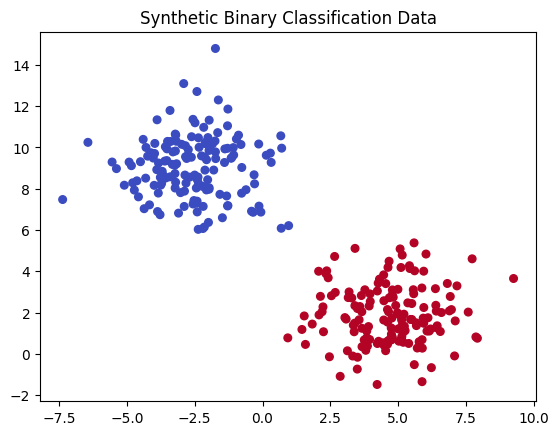

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# Create synthetic 2D data
X, y = make_blobs(n_samples=300, centers=2, random_state=42, cluster_std=1.5)

# Visualize
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)
plt.title("Synthetic Binary Classification Data")
plt.show()


In [2]:
from sklearn.svm import SVC

# Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X, y)

# RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X, y)


SVC(C=1)

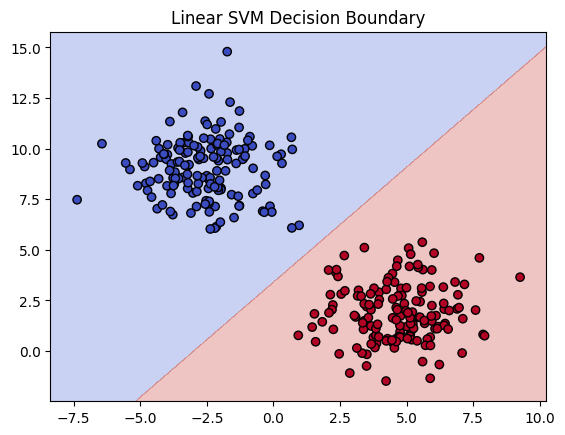

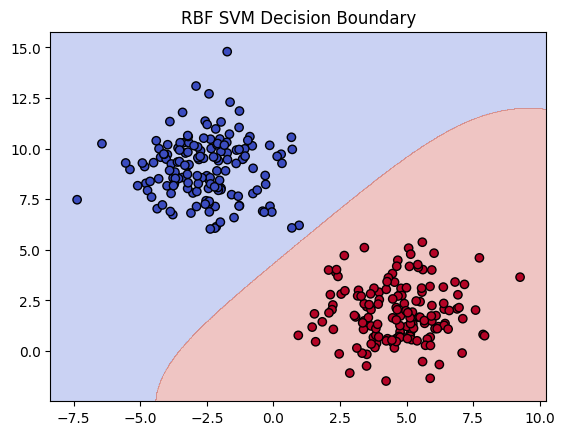

In [4]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

# Create synthetic 2D data
X, y = make_blobs(n_samples=300, centers=2, random_state=42, cluster_std=1.5)

# Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X, y)

# RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X, y)

def plot_svm_boundary(clf, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.show()

plot_svm_boundary(svm_linear, X, y, "Linear SVM Decision Boundary")
plot_svm_boundary(svm_rbf, X, y, "RBF SVM Decision Boundary")

In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1, 10]
}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X, y)

print("Best parameters:", grid.best_params_)


Best parameters: {'C': 0.1, 'gamma': 'scale'}


In [6]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(grid.best_estimator_, X, y, cv=5)
print("Cross-validation accuracy: {:.2f} ± {:.2f}".format(scores.mean(), scores.std()))


Cross-validation accuracy: 1.00 ± 0.00
